Uji asumsi klasik regresi gabungan


Analisis Regresi untuk Chronic_Lung_Disease dan ['Air_Pollution', 'Dust_Allergy', 'Occupational_Hazards', 'Genetic_Risk', 'Smoking', 'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Shortness_of_Breath', 'Dry_Cough']:

Shapiro-Wilk Test Statistic: 0.9498952627182007, p-value: 6.0747862944486084e-18
Normalitas: Residual tidak terdistribusi normal


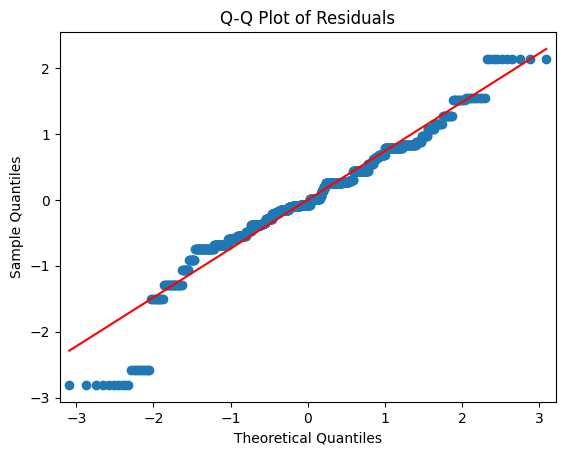

Breusch-Pagan Test Statistic: 304.1283264195851, p-value: 2.0833778871517943e-59
Heteroskedastisitas: Ada indikasi heteroskedastisitas


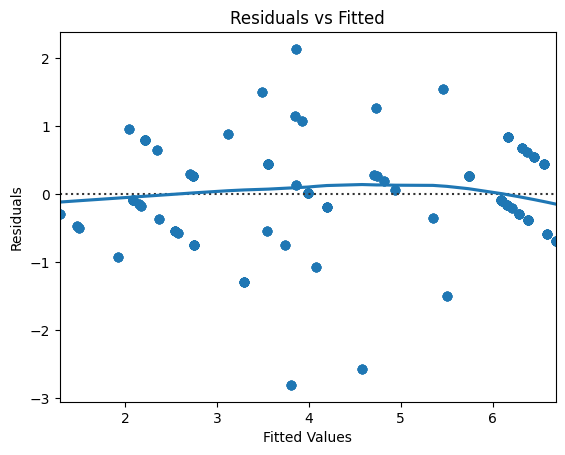

Durbin-Watson Statistic: 1.8334202619267568
Autokorelasi: Tidak ada indikasi autokorelasi



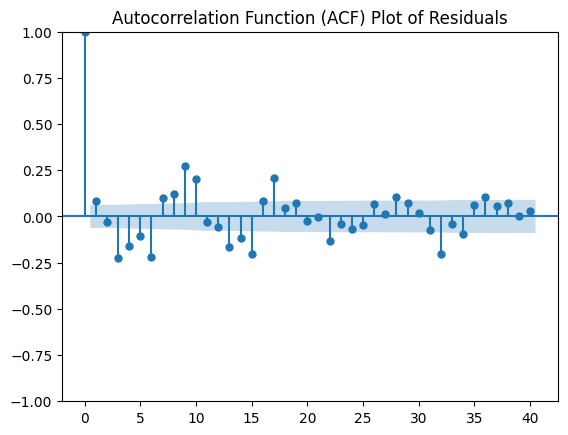

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
data = pd.read_csv('CancerPatientDataSets.csv', delimiter=';')

# Daftar variabel yang ingin dianalisis
variable_combinations = [
        # dependen              # independen
    ('Chronic_Lung_Disease', ['Air_Pollution','Dust_Allergy','Occupational_Hazards','Genetic_Risk','Smoking','Passive_Smoker','Chest_Pain','Coughing_of_Blood','Shortness_of_Breath','Dry_Cough']),

    # Tambahkan kombinasi variabel lainnya sesuai kebutuhan
]

for dependent_var, independent_vars in variable_combinations:
    print("=" * 150)
    print(f"\nAnalisis Regresi untuk {dependent_var} dan {independent_vars}:\n")

    # Variabel dependen dan independen
    y = data[dependent_var]
    X = data[independent_vars]

    # Tambahkan konstanta ke variabel independen
    X = sm.add_constant(X)

    # Fit model regresi
    model = sm.OLS(y, X).fit()

    # # Tampilkan ringkasan hasil regresi
    # print(model.summary())

    # Uji Normalitas Residual
    shapiro_test_stat, shapiro_p_value = stats.shapiro(model.resid)
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")
    if shapiro_p_value < 0.05:
        print("Normalitas: Residual tidak terdistribusi normal")
    else:
        print("Normalitas: Residual terdistribusi normal")

    # Visualisasi Q-Q Plot
    sm.qqplot(model.resid, line='s')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

    # Uji Heteroskedastisitas
    bp_test_stat, bp_p_value, _, _ = het_breuschpagan(model.resid, X)
    print(f"Breusch-Pagan Test Statistic: {bp_test_stat}, p-value: {bp_p_value}")
    if bp_p_value < 0.05:
        print("Heteroskedastisitas: Ada indikasi heteroskedastisitas")
    else:
        print("Heteroskedastisitas: Tidak ada indikasi heteroskedastisitas")

    # Visualisasi Scatter Plot Residual vs Fitted
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, scatter_kws={'alpha': 0.5})
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Uji Autokorelasi
    durbin_watson_stat = sm.stats.durbin_watson(model.resid)
    print(f"Durbin-Watson Statistic: {durbin_watson_stat}")

    if durbin_watson_stat < 1.5 or durbin_watson_stat > 2.5:
        print("Autokorelasi: Ada indikasi autokorelasi")
    else:
        print("Autokorelasi: Tidak ada indikasi autokorelasi\n")

    # Visualisasi Correlogram (ACF Plot)
    sm.graphics.tsa.plot_acf(model.resid, lags=40)
    plt.title('Autocorrelation Function (ACF) Plot of Residuals')
    plt.show()


Pemodelan regresi 1000 data 10 variabel

In [7]:
import pandas as pd
import numpy as np

# Mengganti 'nama_file.csv' dengan nama file CSV yang sesuai
file_path = 'CancerPatientDataSets.csv'

# Membaca data dari file CSV
data = pd.read_csv(file_path, delimiter=';')

# Memilih 10 variabel independen yang numerik
independent_variables = ['Air_Pollution','Dust_Allergy','Occupational_Hazards','Genetic_Risk','Smoking','Passive_Smoker','Chest_Pain','Coughing_of_Blood','Shortness_of_Breath','Dry_Cough']

# Menambahkan kolom konstanta ke variabel independen
X = np.column_stack((np.ones(len(data)), data[independent_variables]))

# Variabel dependen yang ingin diprediksi
y = data['Chronic_Lung_Disease']  # Ganti dengan variabel dependen yang sesuai

# Menghitung matriks (X'X) inverse
XtX_inv = np.linalg.inv(np.dot(X.T, X))

# Menghitung matriks (X'Y)
XtY = np.dot(X.T, y)

# Menghitung koefisien regresi
beta = np.dot(XtX_inv, XtY)

# Menampilkan koefisien regresi
print("Koefisien Regresi:")
for i, var in enumerate(['Intercept'] + independent_variables):
    print(f"{var}: {beta[i]}")


Koefisien Regresi:
Intercept: 1.026245006504471
Air_Pollution: 0.10450085160041178
Dust_Allergy: -0.31881779906823304
Occupational_Hazards: 0.6379925748475755
Genetic_Risk: 0.28264845732362875
Smoking: 0.03274491124751466
Passive_Smoker: -0.019760131742239576
Chest_Pain: 0.06980342102537929
Coughing_of_Blood: 0.02981626616568711
Shortness_of_Breath: -0.12097280535844934
Dry_Cough: 0.05933775673410224


Ringkasan hasil regresi

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

# Load data from CSV
data = pd.read_csv('CancerPatientDataSets.csv', delimiter=';')

# Daftar variabel yang ingin dianalisis
variable_combinations = [
    ('Chronic_Lung_Disease', ['Air_Pollution','Dust_Allergy','Occupational_Hazards','Genetic_Risk','Smoking','Passive_Smoker','Chest_Pain','Coughing_of_Blood','Shortness_of_Breath','Dry_Cough']),

]

for dependent_var, independent_var in variable_combinations:
    print("🟰" * 55)
    print(f"\nAnalisis Regresi untuk {dependent_var} dan {independent_var}:\n")

    # Variabel dependen dan independen
    y = data[dependent_var]
    X = data[independent_var]

    # Tambahkan konstanta ke variabel independen
    X = sm.add_constant(X)

    # Fit model regresi
    model = sm.OLS(y, X).fit()

    # Tampilkan ringkasan hasil regresi
    print(model.summary())

    # Uji Simultan Regresi (F-statistik)
    f_statistic, f_p_value = sm.stats.linear_rainbow(model)
    print()
    print(f"F-statistic: {f_statistic}, p-value: {f_p_value}")
    if f_p_value < 0.05:
        print("Kesimpulan: Setidaknya satu variabel independen memiliki efek yang signifikan terhadap variabel dependen")
    else:
        print("Kesimpulan: Tidak ada bukti signifikansi keseluruhan model regresi")

    # Uji Kebaikan Model menggunakan R2
    r_squared = model.rsquared
    print()
    print(f"R-squared: {r_squared}\n")



🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰🟰

Analisis Regresi untuk Chronic_Lung_Disease dan ['Air_Pollution', 'Dust_Allergy', 'Occupational_Hazards', 'Genetic_Risk', 'Smoking', 'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Shortness_of_Breath', 'Dry_Cough']:

                             OLS Regression Results                             
Dep. Variable:     Chronic_Lung_Disease   R-squared:                       0.839
Model:                              OLS   Adj. R-squared:                  0.838
Method:                   Least Squares   F-statistic:                     516.3
Date:                  Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                          08:27:13   Log-Likelihood:                -1118.9
No. Observations:                  1000   AIC:                             2260.
Df Residuals:                       989   BIC:                             2314.
Df Model:                            10                                